# Task 3
Use astropy:  
I.  to input the coordinates of the object M33.   
II. to provide the location of Bear Mountain on Earth at 11pm EDT on 2012 July 12.   
  
Use astropy.coordinates to find the Alt, Az coordinates of M33 at as observed from Bear Mountain at 11pm on 2012 July 12.   
Find the alt,az coordinates of M33 at 100 times evenly spaced between 10pm and 7am EDT.   
Use get_sun to find the location of the Sun at 1000 evenly spaced times between noon on July 12 and noon on July 13.

In [1]:
#Importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style, quantity_support

plt.style.use(astropy_mpl_style)
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x18407f95160>

In [2]:
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

In [3]:
#Finding the coordinates of M33 from the inbuilt directory
m33=SkyCoord.from_name('M33')

In [4]:
#defining the location of Bear Mountain, the UTC offset of the location and defining the time
bear=EarthLocation(lat=41.3*u.deg,lon=-74*u.deg,height=390*u.m)
utcoffset=-4*u.hour
time=Time('2012-7-12 23:00:00')-utcoffset

In [6]:
#Finding the altitude and azimuth of M33 at Bear Mountain
m33altaz=m33.transform_to(AltAz(obstime=time,location=bear))
print("M33's Altitude = {0.alt:.2}".format(m33altaz))

M33's Altitude = 0.13 deg


In [5]:
#Defining midnight
midnight=Time('2012-7-13 00:00:00')-utcoffset

#Marking 100 equally spaced time intervals from 10pm to 7am and finding the altitude and azimuth of M33 for given times
del_midnight=np.linspace(-2,10,100)*u.hour
frame_jul13=AltAz(obstime=midnight+del_midnight,location=bear)
m33jul13=m33.transform_to(frame_jul13)

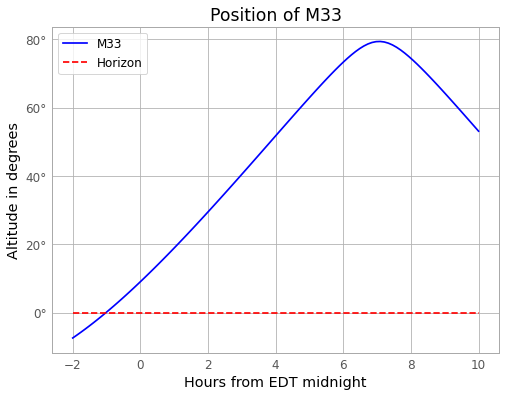

In [22]:
#Plotting the position of M33 according to the previously calculated values
plt.plot(del_midnight,m33jul13.alt,c="Blue",label="M33")
#Plotting the location of the horizon at 0 degrees
plt.plot(del_midnight,np.zeros(len(del_midnight)),label="Horizon",c="Red",ls='--')
#Defining labels and legend
plt.title("Position of M33")
plt.xlabel("Hours from EDT midnight")
plt.ylabel("Altitude in degrees")
plt.legend()

In [13]:
#importing get_sun and finding the position of the time for the given time period
from astropy.coordinates import get_sun
delta_midnight = np.linspace(-12, 12, 1000)*u.hour
times_July12_to_13 = midnight + delta_midnight
frame_July12_to_13 = AltAz(obstime=times_July12_to_13, location=bear)
sunaltazs_July12_to_13 = get_sun(times_July12_to_13).transform_to(frame_July12_to_13)

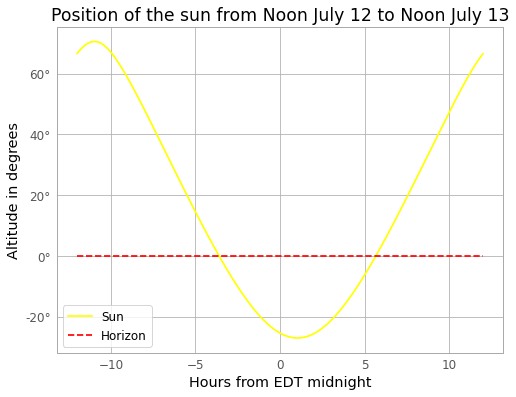

In [21]:
#Plotting the position of the Sun
plt.figure(0)
plt.plot(delta_midnight,sunaltazs_July12_to_13.alt,c="yellow",label="Sun")
#Plotting the location of the horizon at 0 degrees
plt.plot(delta_midnight,np.zeros(len(delta_midnight)),label="Horizon",c="Red",ls='--')
#Defining labels and legend
plt.title("Position of the sun from Noon July 12 to Noon July 13")
plt.xlabel("Hours from EDT midnight")
plt.ylabel("Altitude in degrees")
plt.legend()